In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

In [20]:
# Creating and training regression model
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

model.fit(X, y)

LinearRegression()

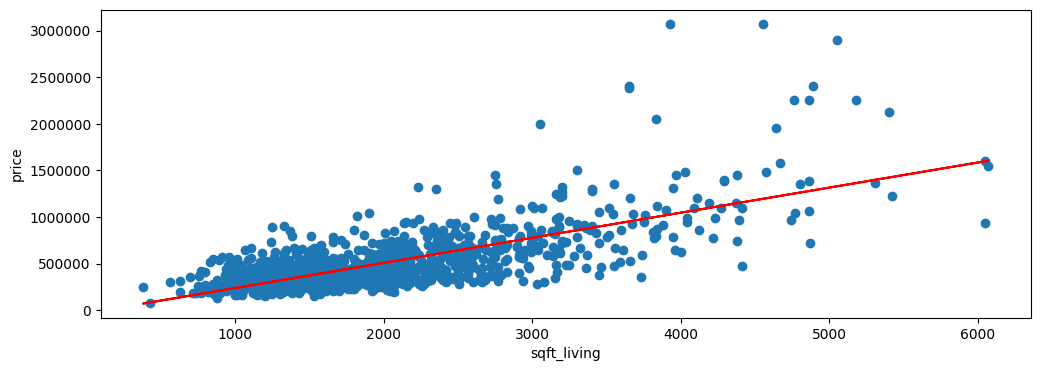

Mean square error: 57947526161.288376
0.49670880166311393


In [21]:
# Ploting
plt.figure(figsize=(12, 4))
price_to_sqft=plt.scatter(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
regression=plt.plot(X, model.predict(X), color='red')
plt.show()

print("Mean square error:", mean_squared_error(y, model.predict(X)))
print(model.score(X, y))

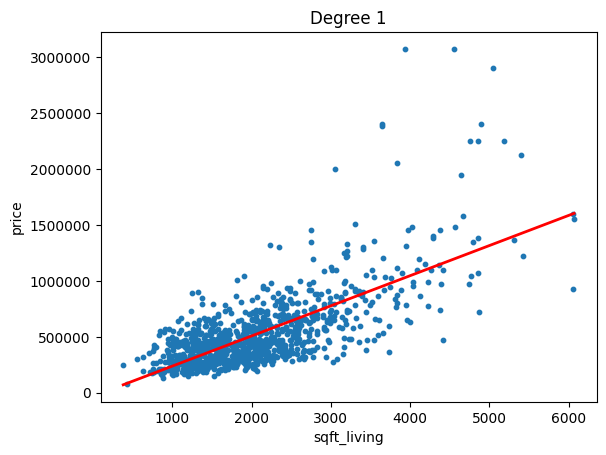

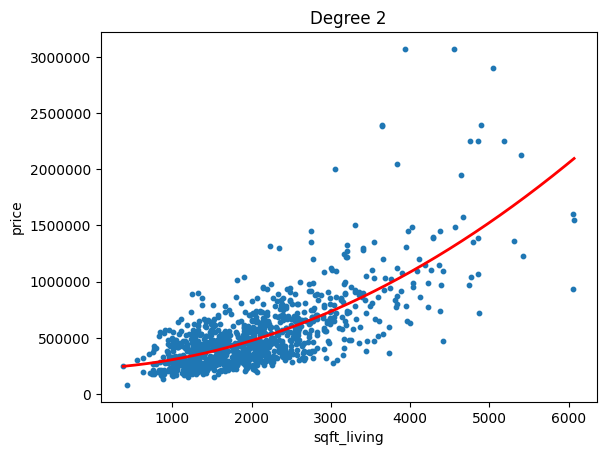

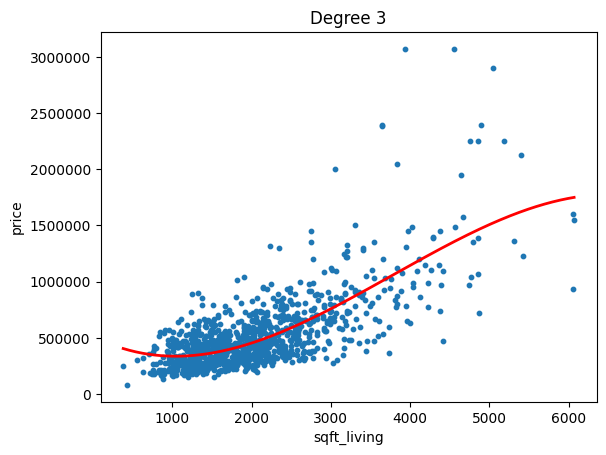

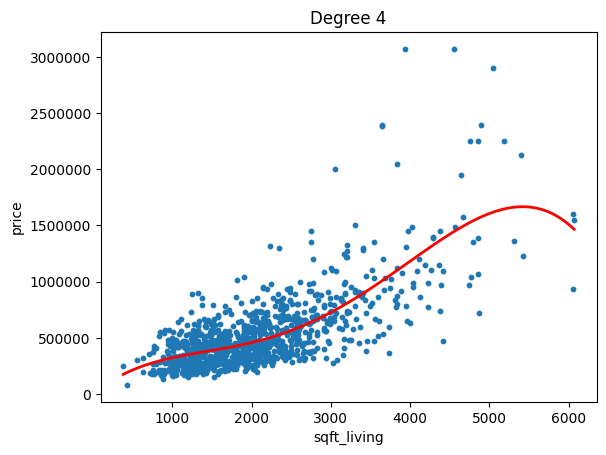

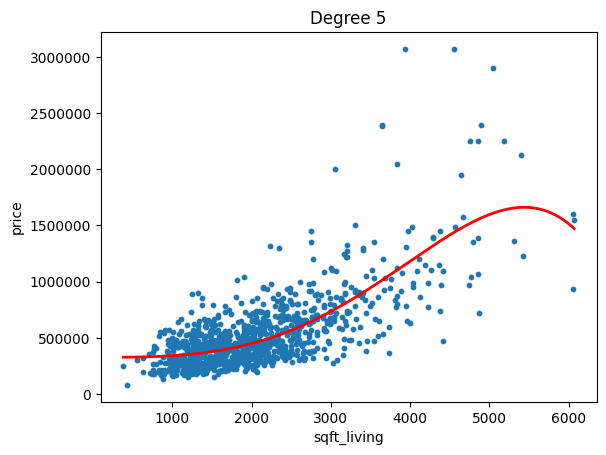

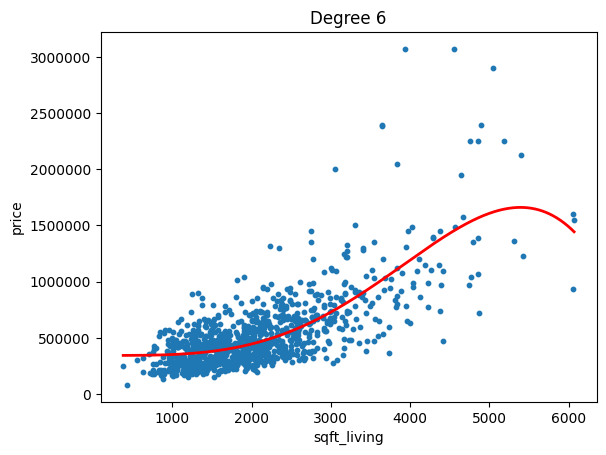

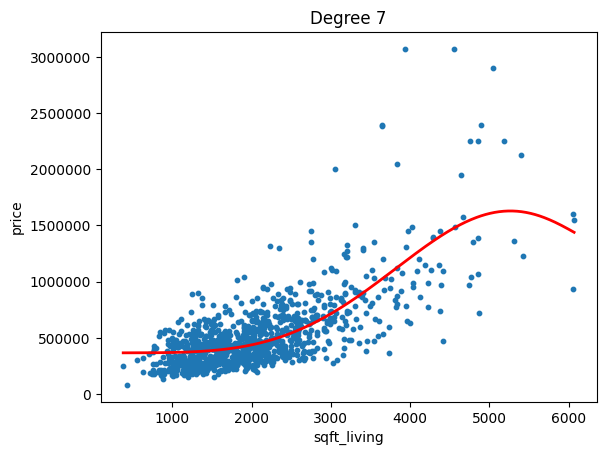

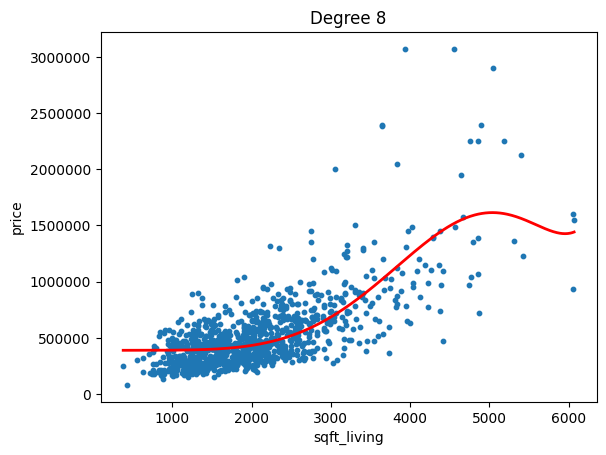

In [22]:
#Creating polynomial regression
for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    X_grid = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_grid_poly = poly.transform(X_grid)
    y_grid = model.predict(X_grid_poly)

    plt.figure()
    plt.scatter(X, y, s=10)
    plt.plot(X_grid, y_grid, linewidth=2, color='red')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title(f'Degree {order}')
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    plt.show()


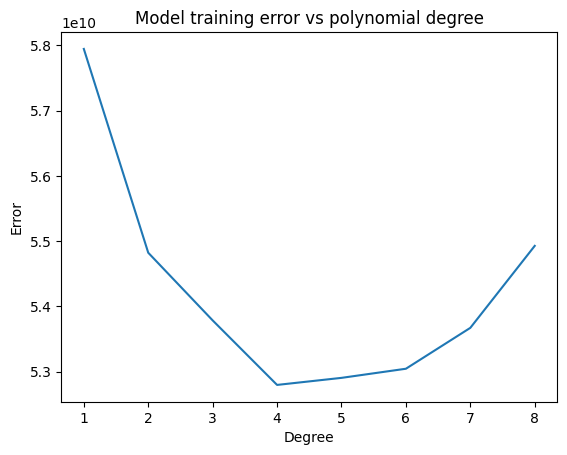

In [23]:
#Comparing MSE of diffrent polynomials
degrees = range(1, 9)
errors = []

for order in degrees:
    poly = PolynomialFeatures(order, include_bias=False)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)

plt.plot(degrees, errors)
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Model training error vs polynomial degree')
plt.show()

Test MSE, training MSE differance for polynomial degree 1: -14146386413.056023
Test MSE, training MSE differance for polynomial degree 2: -27098700029.432167
Test MSE, training MSE differance for polynomial degree 3: -24184252060.49656
Test MSE, training MSE differance for polynomial degree 4: -21041097809.829636
Test MSE, training MSE differance for polynomial degree 5: -16064237794.946701
Test MSE, training MSE differance for polynomial degree 6: -14490006299.611336
Test MSE, training MSE differance for polynomial degree 7: -15121517191.512688
Test MSE, training MSE differance for polynomial degree 8: -14528376871.80175


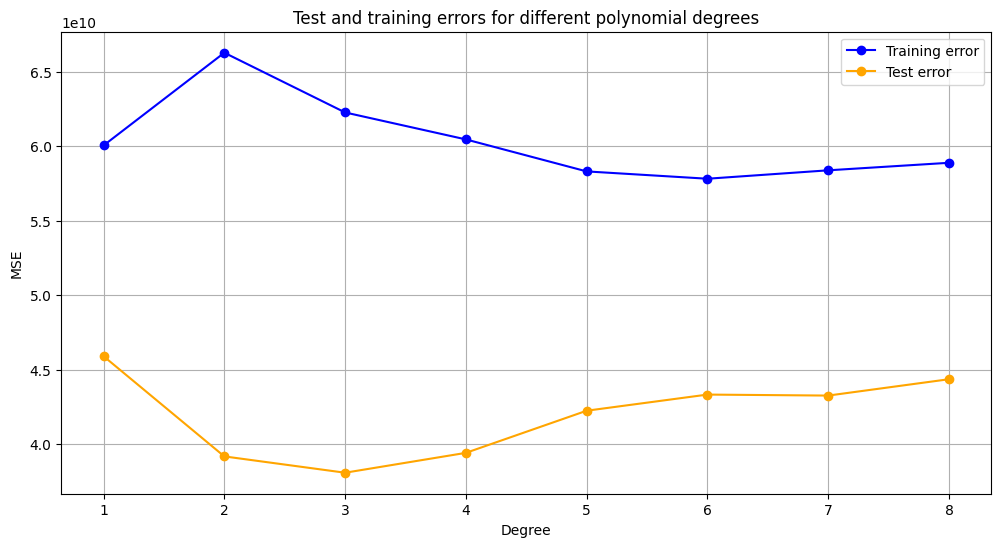

In [24]:
#Creating arrays to collect error values
training_errors = []
test_errors = []

for order in range(1,9):

    #Randomly dividing set into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=24)

    #Generating polonomial features
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    #Incializing model and fitting the data
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Caluclating preddictions for training set and test set to compare errors
    y_preddicted_train = model.predict(X_train)
    y_preddicted_test = model.predict(X_test)

    #Calculating mean squared errors for preddictions and saving them in arrays
    train_error = mean_squared_error(y_train, y_preddicted_train)
    test_error = mean_squared_error(y_test, y_preddicted_test)
    training_errors.append(train_error)
    test_errors.append(test_error)

    print(f'Test MSE, training MSE differance for polynomial degree {order}: {test_error - train_error}')

#Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), training_errors, marker='o', label='Training error', color='blue')
plt.plot(range(1, 9), test_errors, marker='o', label='Test error', color='orange')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Test and training errors for different polynomial degrees')
plt.legend()
plt.grid()
plt.show()

#We created a plot showing training errors in comparison to test errors for different poynomial degress and printed differances

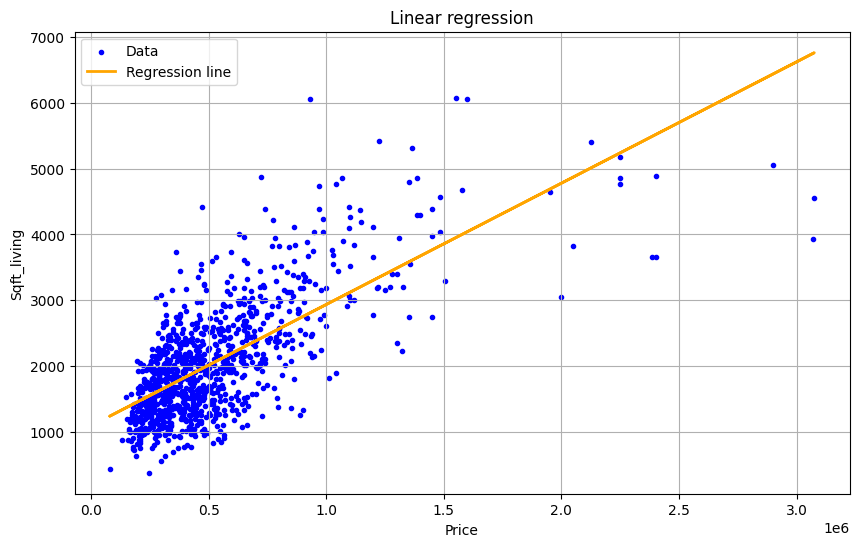

In [25]:
#Training model to predict sqft_living for a given house price

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X, y)

sqft_living_pred=model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=9, label='Data')
plt.plot(X, sqft_living_pred, color='orange', linewidth=2, label='Regression line')
plt.title('Linear regression')
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.legend()
plt.grid()
plt.show()


In [26]:
#b) Creating models, which uses diffrent variables to see, which is better

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


# Changed sqft_lot to condition

X = house_df[['sqft_living', 'condition', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 54053591747.298004
Mean squared error equals: 47955354197.36157
